# **Structured Data Assignement**

## **Brief Description of the Dataset**


The dataset in question contains a comprehensive collection of electronic      health records belonging to patients who have been diagnosed with a specific   disease. These health records comprise a detailed log of every aspect of the    patients' medical history, including all diagnoses, symptoms, prescribed drug   treatments, and medical tests that they have undergone. Each row represents a  healthcare record/medical event for a patient and it includes a timestamp for  each entry/event, thereby allowing for a chronological view of the patient's medical history.

The Data has mainly three columns :

1) **Patient-Uid** - Unique Alphanumeric Identifier for a patient            
2) **Date** - Date when patient encountered the event.                           
3) **Incident** - This columns describes which event occurred on the day.

## **Problem Statement - 1**

The development of drugs is critical in providing therapeutic options
for patients suffering from chronic and terminal illnesses. “Target Drug”, in particular, is designed to enhance the patient's health and well-being without causing dependence on other medications that could potentially lead to severe and life-threatening side effects. These drugs are specifically tailored to treat a particular disease or condition, offering a more focused and effective approach to treatment, while minimising the risk of harmful reactions.

## **Objective of the Problem definition**

To develop a predictive model which will predict
whether a patient will be eligible*** for “Target Drug” or not in next 30 days. Knowing
if the patient is eligible or not will help physician treating the patient make informed
decision on the which treatments to give.

*** - A patient is considered eligible for a particular drug when they have taken their
first prescription for that drug.


# **Data Preprocessing**

## **1.Data Jar**

### **1.1 Data Cleaning**

#### **1.1.1 Importing The Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_auc_score as ras, roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

#### **1.1.2 Load Training Dataset**

In [30]:
df_train = pd.read_parquet("/content/drive/MyDrive/Akaike/Datasets/train.parquet")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **1.1.3 Structured Data**

In [6]:
# to check the structured data size
print(df_train.shape)

(3220868, 3)




```
============Interpretation=================
Here we have totally 3220868 rows and 3 columns
 ```


In [7]:
#Fetching first 5 rows in dataset
df_train.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [8]:
#Fetching last five 5 rows in dataset
df_train.tail()

,Patient-Uid,Date,Incident
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6
29080911,a0ee146e-1c7c-11ec-baee-16262ee38c7f,2018-10-05,DRUG_TYPE_1


#### **1.1.4 check and drop duplicates**

In [9]:
#checking for no of duplicate values
df_train.duplicated().sum()

35571



```
============Interpretation=================
Here we have totally 35571 duplicate rows. we already know there is no use of duplicate data's. so we can drop the duplicate from the dataset
```



In [10]:
df_train.drop_duplicates(inplace=True)
df_train.shape

(3185297, 3)

In [11]:
#checking for no of duplicate values
df_train.duplicated().sum()

0



```
============Interpretation=================
So we completely removed the duplicate rows from the dataset
```



#### **1.1.5 Feature by Feature Cleaning**

In [12]:
#show all column names from the dataset
df_train.columns

Index(['Patient-Uid', 'Date', 'Incident'], dtype='object')

##### **Column-1. Patient-Uid**

In [13]:
#check the data type
df_train['Patient-Uid'].dtypes

dtype('O')

In [14]:
#check the null values
df_train['Patient-Uid'].isnull().sum()

0



```
============Interpretation=================
There is no null values in "Patient-Uid" column
```



In [15]:
df_train['Patient-Uid'].nunique()

27033

In [16]:
df_train['Patient-Uid'].value_counts()

a0ddfd2c-1c7c-11ec-876d-16262ee38c7f    1645
a0ea618f-1c7c-11ec-93fb-16262ee38c7f    1316
a0df4809-1c7c-11ec-be0b-16262ee38c7f    1093
a0ec2afe-1c7c-11ec-befd-16262ee38c7f    1068
a0e553c4-1c7c-11ec-83f1-16262ee38c7f     994
                                        ... 
a0ecc127-1c7c-11ec-92b5-16262ee38c7f      31
a0eb794b-1c7c-11ec-92d7-16262ee38c7f      29
a0f02cd8-1c7c-11ec-96a0-16262ee38c7f      28
a0efac48-1c7c-11ec-9daa-16262ee38c7f      25
a0f0d0b5-1c7c-11ec-9901-16262ee38c7f      24
Name: Patient-Uid, Length: 27033, dtype: int64


```
============Interpretation=================
From above result we can clearly understood totally we have 27033 unique
patient details from the dataset and also we know how many incident or medical
event happened from each patient
```



##### **Column-2. Date**

In [ ]:
#check the data type
df_train.Date.dtypes

dtype('<M8[ns]')

In [19]:
#check the null values
df_train['Patient-Uid'].isnull().sum()

0



```
============Interpretation=================
There is no null values in "Date" column
```



In [20]:
df_train['Date'].value_counts()

2019-05-21    3645
2019-05-22    3330
2019-03-05    3156
2019-05-14    3134
2019-03-12    2986
              ... 
2017-01-27     308
2017-02-28     285
2020-02-29     282
2016-01-29     271
2016-02-29     255
Name: Date, Length: 1977, dtype: int64

#####**Column-3. Incident**

In [21]:
#check the data type
df_train.Incident.dtypes

dtype('O')

In [22]:
#check the null values
df_train['Incident'].isnull().sum()

0


```
============Interpretation=================
There is no null values in "Incident" column

```





In [23]:
df_train.Incident.nunique()

57

In [24]:
df_train.Incident.value_counts()

DRUG_TYPE_6          549616
DRUG_TYPE_1          484565
PRIMARY_DIAGNOSIS    424879
DRUG_TYPE_0          298881
DRUG_TYPE_2          256203
DRUG_TYPE_7          251239
DRUG_TYPE_8          158706
DRUG_TYPE_3          126615
TEST_TYPE_1           96810
TARGET DRUG           67218
DRUG_TYPE_9           66894
DRUG_TYPE_5           55940
SYMPTOM_TYPE_0        46078
DRUG_TYPE_11          45419
SYMPTOM_TYPE_6        32066
TEST_TYPE_0           27570
SYMPTOM_TYPE_7        22019
DRUG_TYPE_10          20911
DRUG_TYPE_14          17306
DRUG_TYPE_13          12321
DRUG_TYPE_12           9540
SYMPTOM_TYPE_14        8927
SYMPTOM_TYPE_1         8608
SYMPTOM_TYPE_2         8168
TEST_TYPE_3            8115
SYMPTOM_TYPE_5         7583
SYMPTOM_TYPE_8         7430
TEST_TYPE_2            7021
SYMPTOM_TYPE_15        6295
SYMPTOM_TYPE_10        6005
SYMPTOM_TYPE_29        5910
SYMPTOM_TYPE_16        4940
DRUG_TYPE_15           4906
SYMPTOM_TYPE_9         4885
DRUG_TYPE_4            4566
SYMPTOM_TYPE_4      



```
============Interpretation=================
From above result we can clearly understood totally we have 57 unique
Incident  from the dataset and also we know how many incident or medical
event happened from the dataset.
```



### **1.2 EDA- Exploratory Data Analysis**

In [ ]:
# to sort the dataset based on the date and each patient_id group

# Define a function to sort each group by 'Date'
def sort_group(group):
    return group.sort_values(by='Date')

# Apply the sorting function to each group within 'Patient-Uid'
df_train = df_train.groupby('Patient-Uid').apply(sort_group)

# Reset the index to obtain a flat DataFrame
df_train = df_train.reset_index(drop=True)

In [ ]:
df_train.tail(10)

,Patient-Uid,Date,Incident
3185287,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-04-10,DRUG_TYPE_1
3185288,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-05,TEST_TYPE_2
3185289,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-05,TEST_TYPE_1
3185290,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-05,PRIMARY_DIAGNOSIS
3185291,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-18,TARGET DRUG
3185292,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,DRUG_TYPE_6
3185293,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG
3185294,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,DRUG_TYPE_1
3185295,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,TARGET DRUG
3185296,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-08,DRUG_TYPE_5


In [26]:
# Fetching target drug taken patient id
df_target = df_train[df_train.Incident=='TARGET DRUG']
uni_patient_id=df_target['Patient-Uid'].unique()
uni_patient_id

array(['a0eb742b-1c7c-11ec-8f61-16262ee38c7f',
       'a0edaf09-1c7c-11ec-a360-16262ee38c7f',
       'a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f', ...,
       'a0ef1c8c-1c7c-11ec-b007-16262ee38c7f',
       'a0f08a4d-1c7c-11ec-bb15-16262ee38c7f',
       'a0efc1fa-1c7c-11ec-9e1c-16262ee38c7f'], dtype=object)

In [31]:
df1_train = df_train.iloc[0:0]
df1_train

,Patient-Uid,Date,Incident


In [34]:
df_train_copy = df_train.copy()
df_train_copy

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [35]:
df_train_copy.sort_values(by=['Patient-Uid','Date'],inplace=True)

In [36]:
df=dict(list(df_train_copy.groupby('Patient-Uid')))

In [37]:
for i in df.keys():
  df[i].set_index(df[i]['Date'],drop=True,inplace=True)

In [ ]:
#to create incident cumulative count column
# df_train['Incident_Count'] = df_train.groupby('Patient-Uid')['Date'].cumcount()
# df_train.head()

In [27]:
#to create a target column based on Eligibile Criteria
df_train['Target_drug'] = df_train['Patient-Uid'].isin(uni_patient_id)
df_train.head()

,Patient-Uid,Date,Incident,Target_drug
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS,False
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS,False
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0,False
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0,False
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1,False


In [28]:
#len=[len(df_train[df_train['Eligiblity_for_drug']==True]),len(df_train[df_train['Eligiblity_for_drug']==False])]
len = [sum(df_train['Target_drug'] == 1), sum(df_train['Target_drug'] == 0)]

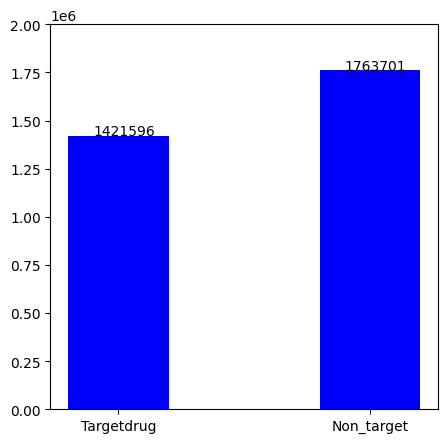

In [29]:
fig = plt.figure(figsize = (5, 5))
# creating the bar plot
plt.bar(['Targetdrug','Non_target'], len, color ='b',width = 0.4)
plt.text(x=-.1,y=len[0]+ 200, s=str(len[0]))
plt.text(x=0.9,y=len[1]+200, s=str(len[1]))
plt.ylim(0,2000000)
plt.show()

#### **1.2.1- Positive Set**

In [38]:
# Creating positive set
for i in df.keys():
  if i in uni_patient_id:
   for j in list(df[i].index):
     tra_dat=list(df[i][df[i]['Incident']=='TARGET DRUG'].Date)[0]
     date=list(pd.date_range(end=tra_dat,periods=30,freq='D'))
     if j in date:
       t=df[i].loc[:j,:]
   df1_train =pd.concat([df1_train,t],ignore_index=True)

In [39]:
positive_set =df1_train.copy()
positive_set.head()

,Patient-Uid,Date,Incident
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-04-14,DRUG_TYPE_7
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,TEST_TYPE_0
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,DRUG_TYPE_0
3,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,DRUG_TYPE_8
4,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2015-09-07,DRUG_TYPE_7


In [40]:
positive_set1 = pd.get_dummies(positive_set, columns=["Incident"])
positive_set1.drop(['Incident_TARGET DRUG','Date'],axis=1,inplace=True)
col=list(positive_set1.columns[1:])
positive_set1=positive_set1.groupby('Patient-Uid')[col].sum()
positive_set1['Target_Drug']=1
positive_set1

,Incident_DRUG_TYPE_0,Incident_DRUG_TYPE_1,Incident_DRUG_TYPE_10,Incident_DRUG_TYPE_11,Incident_DRUG_TYPE_12,Incident_DRUG_TYPE_13,Incident_DRUG_TYPE_14,Incident_DRUG_TYPE_15,Incident_DRUG_TYPE_16,Incident_DRUG_TYPE_17,...,Incident_SYMPTOM_TYPE_7,Incident_SYMPTOM_TYPE_8,Incident_SYMPTOM_TYPE_9,Incident_TEST_TYPE_0,Incident_TEST_TYPE_1,Incident_TEST_TYPE_2,Incident_TEST_TYPE_3,Incident_TEST_TYPE_4,Incident_TEST_TYPE_5,Target_Drug
Patient-Uid,,,,,,,,,,,,,,,,,,,,,
a0e9c384-1c7c-11ec-81a0-16262ee38c7f,6,10,0,10,0,0,0,0,0,0,...,0,0,0,4,1,1,0,0,0,1
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,5,3,2,0,0,0,0,0,0,0,...,0,0,0,0,2,1,0,0,0,1
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,1,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
a0e9c414-1c7c-11ec-889a-16262ee38c7f,0,2,0,0,0,0,0,0,0,0,...,1,0,0,0,9,0,0,0,0,1
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,12,17,0,6,0,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,41,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,18,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
a0f0d523-1c7c-11ec-89d2-16262ee38c7f,7,48,0,3,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1


#### **1.2.2- Negative Set**

In [42]:
negative_set=df_train.iloc[0:0]
negative_set

,Patient-Uid,Date,Incident


In [43]:
#to generate the negative set
for i in df.keys():
  if i not in uni_patient_id:
     g=df[i]
     negative_set=pd.concat([negative_set,g],ignore_index=True)

In [44]:
negative_set1 = pd.get_dummies(negative_set, columns=["Incident"])
negative_set1.drop(['Date'],axis=1,inplace=True)
col=list(negative_set1.columns[1:])
negative_set1=negative_set1.groupby('Patient-Uid')[col].sum()
negative_set1['Target_Drug']=0
negative_set1

,Incident_DRUG_TYPE_0,Incident_DRUG_TYPE_1,Incident_DRUG_TYPE_10,Incident_DRUG_TYPE_11,Incident_DRUG_TYPE_12,Incident_DRUG_TYPE_13,Incident_DRUG_TYPE_14,Incident_DRUG_TYPE_15,Incident_DRUG_TYPE_16,Incident_DRUG_TYPE_17,...,Incident_SYMPTOM_TYPE_7,Incident_SYMPTOM_TYPE_8,Incident_SYMPTOM_TYPE_9,Incident_TEST_TYPE_0,Incident_TEST_TYPE_1,Incident_TEST_TYPE_2,Incident_TEST_TYPE_3,Incident_TEST_TYPE_4,Incident_TEST_TYPE_5,Target_Drug
Patient-Uid,,,,,,,,,,,,,,,,,,,,,
a0db1e73-1c7c-11ec-ae39-16262ee38c7f,29,0,0,1,0,0,0,0,0,0,...,1,0,0,10,2,0,0,0,0,0
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,8,27,0,0,0,0,0,0,0,0,...,0,0,0,1,4,0,0,0,0,0
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,6,7,0,10,0,0,0,0,0,0,...,0,0,0,3,2,0,0,0,0,0
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,15,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2,45,0,24,0,0,0,0,0,0,...,5,6,0,9,27,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a0e9c298-1c7c-11ec-954b-16262ee38c7f,4,41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
a0e9c2c7-1c7c-11ec-9b2e-16262ee38c7f,7,0,0,0,0,0,0,0,0,0,...,1,0,0,16,1,0,0,0,0,0
a0e9c2f7-1c7c-11ec-8bac-16262ee38c7f,0,11,0,0,0,0,0,0,0,0,...,1,0,0,0,5,0,0,0,0,0


In [ ]:
# # to get the difference between the most recent prescription and the prediction date.
# prediction_date = pd.to_datetime('today') + pd.DateOffset(days=30)
# positive_set1['Time_diff'] = (prediction_date - positive_set.groupby('Patient-Uid')['Date'].transform('max')).dt.days
# negative_set1['Time_diff'] = (prediction_date - negative_set.groupby('Patient-Uid')['Date'].transform('max')).dt.days

In [45]:
# creating new dataset by concating positive and negative sets
df_train_concat= pd.concat([positive_set1, negative_set1])
df_train_concat.fillna(0.0,inplace=True)
df_train_concat.head()

,Incident_DRUG_TYPE_0,Incident_DRUG_TYPE_1,Incident_DRUG_TYPE_10,Incident_DRUG_TYPE_11,Incident_DRUG_TYPE_12,Incident_DRUG_TYPE_13,Incident_DRUG_TYPE_14,Incident_DRUG_TYPE_15,Incident_DRUG_TYPE_16,Incident_DRUG_TYPE_17,...,Incident_SYMPTOM_TYPE_8,Incident_SYMPTOM_TYPE_9,Incident_TEST_TYPE_0,Incident_TEST_TYPE_1,Incident_TEST_TYPE_2,Incident_TEST_TYPE_3,Incident_TEST_TYPE_4,Incident_TEST_TYPE_5,Target_Drug,Incident_DRUG_TYPE_18
Patient-Uid,,,,,,,,,,,,,,,,,,,,,
a0e9c384-1c7c-11ec-81a0-16262ee38c7f,6,10,0,10,0,0,0,0,0,0,...,0,0,4,1,1,0,0,0,1,0.0
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,5,3,2,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,0,1,0.0
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,1,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
a0e9c414-1c7c-11ec-889a-16262ee38c7f,0,2,0,0,0,0,0,0,0,0,...,0,0,0,9,0,0,0,0,1,0.0
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,12,17,0,6,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,0.0


In [46]:
df_train_concat.columns.unique()

Index(['Incident_DRUG_TYPE_0', 'Incident_DRUG_TYPE_1', 'Incident_DRUG_TYPE_10',
       'Incident_DRUG_TYPE_11', 'Incident_DRUG_TYPE_12',
       'Incident_DRUG_TYPE_13', 'Incident_DRUG_TYPE_14',
       'Incident_DRUG_TYPE_15', 'Incident_DRUG_TYPE_16',
       'Incident_DRUG_TYPE_17', 'Incident_DRUG_TYPE_2', 'Incident_DRUG_TYPE_3',
       'Incident_DRUG_TYPE_4', 'Incident_DRUG_TYPE_5', 'Incident_DRUG_TYPE_6',
       'Incident_DRUG_TYPE_7', 'Incident_DRUG_TYPE_8', 'Incident_DRUG_TYPE_9',
       'Incident_PRIMARY_DIAGNOSIS', 'Incident_SYMPTOM_TYPE_0',
       'Incident_SYMPTOM_TYPE_1', 'Incident_SYMPTOM_TYPE_10',
       'Incident_SYMPTOM_TYPE_11', 'Incident_SYMPTOM_TYPE_12',
       'Incident_SYMPTOM_TYPE_13', 'Incident_SYMPTOM_TYPE_14',
       'Incident_SYMPTOM_TYPE_15', 'Incident_SYMPTOM_TYPE_16',
       'Incident_SYMPTOM_TYPE_17', 'Incident_SYMPTOM_TYPE_18',
       'Incident_SYMPTOM_TYPE_19', 'Incident_SYMPTOM_TYPE_2',
       'Incident_SYMPTOM_TYPE_20', 'Incident_SYMPTOM_TYPE_21',
       '

### **1.3 Splitting**

In [47]:
x = df_train_concat.drop(columns=['Target_Drug']).values
y = df_train_concat.Target_Drug.values

In [48]:
# splitting dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=42)

In [49]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20274, 56), (6759, 56), (20274,), (6759,))

### **1.5 balanced Data ?**

In [97]:
pd.Series(y_train).value_counts() / pd.Series(y_train).shape[0]

0    0.653053
1    0.346947
dtype: float64

### **1.6 Scaling**

In [50]:
from sklearn.preprocessing import StandardScaler #import StandardScaler funtion
scaler =StandardScaler() #Initialize StandardScaler funtion
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

## **2. Task Jar**

Labled data-Supervised learning-binary classification-so we can use logistic regression, knn, decision tree, random forest, xg boost

## **3,4,5 Model jar,loss jar,learning jar**

### **1. Logistic Regression**

In [51]:
from sklearn.linear_model import LogisticRegression #import the LogisticRegression
from sklearn.model_selection import cross_val_score
LR = LogisticRegression()  #initialize the LogisticRegression
LR.fit(x_train_scaled,y_train)

LogisticRegression()

In [52]:
cross_val_LR = cross_val_score(LR,x_train_scaled,y_train,cv=10).mean()
cross_val_LR

0.7517521594568006

### **2.K Nearest Neighbor Classification**

#### **2.1 Choosing the best value of K**

In [53]:
from sklearn.neighbors import KNeighborsClassifier #import the KNeighborsClassifier

for k in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
    knn_classifier = KNeighborsClassifier(k) #initialize the KNeighborsClassifier
    knn_classifier.fit(x_train_scaled,y_train)
    print('k value :', k, 'training_score :', knn_classifier.score(x_train_scaled,y_train), 'cv_score :', cross_val_score(knn_classifier,x_train_scaled,y_train,cv=10).mean())

k value : 1 training_score : 1.0 cv_score : 0.7097275780902588
k value : 2 training_score : 0.8559731676038276 cv_score : 0.733402590667021
k value : 3 training_score : 0.8587846502910131 cv_score : 0.7402591396813627
k value : 4 training_score : 0.8306204991614876 cv_score : 0.7452408267481698
k value : 5 training_score : 0.8301272565847884 cv_score : 0.7482504677971643
k value : 6 training_score : 0.8152806550261419 cv_score : 0.75372527583734
k value : 7 training_score : 0.8153793035414817 cv_score : 0.7550081298914361
k value : 8 training_score : 0.8070435039952649 cv_score : 0.757720429040303
k value : 9 training_score : 0.8087205287560422 cv_score : 0.7604338228783222
k value : 10 training_score : 0.8047745881424485 cv_score : 0.7606303803971824
k value : 20 training_score : 0.7928874420439972 cv_score : 0.7671904146098674
k value : 30 training_score : 0.7870671796389465 cv_score : 0.7679302298652607
k value : 40 training_score : 0.784206372694091 cv_score : 0.7686211976580464
k 

#### **2.2 Implementing K Nearest Neighbor Classification**

In [54]:
knn_classifier = KNeighborsClassifier(40) #initialize the KNeighborsClassifier
knn_classifier.fit(x_train_scaled,y_train)
print('k value :', 40, 'training_score :', knn_classifier.score(x_train_scaled,y_train), 'cv_score :', cross_val_score(knn_classifier,x_train_scaled,y_train,cv=10).mean())

k value : 40 training_score : 0.784206372694091 cv_score : 0.7686211976580464


In [55]:
cross_val_knn_classifier=cross_val_score(knn_classifier,x_train_scaled,y_train,cv=10).mean()
cross_val_knn_classifier

0.7686211976580464

### **3. Decision Tree**

#### **3.1 Choosing the best of depth Value**

In [56]:
from sklearn.tree import DecisionTreeClassifier #import the decisiontreeclassifier

for depth in [1,2,3,4,5,6,7,8,9,10,20,26,27,28,29,30,31,32,33,34,35,40,50,51]:
  dt_classifier = DecisionTreeClassifier(max_depth=depth)
  dt_classifier.fit(x_train_scaled,y_train)
  print('k value :', depth, 'Training_Accuracy :', dt_classifier.score(x_train_scaled,y_train), 'cv_score :', cross_val_score (dt_classifier,x_train_scaled,y_train,cv=10).mean())

k value : 1 Training_Accuracy : 0.6833382657591003 cv_score : 0.6754961374501429
k value : 2 Training_Accuracy : 0.7048436421031864 cv_score : 0.7040551421684966
k value : 3 Training_Accuracy : 0.7110584985695966 cv_score : 0.7076560369917358
k value : 4 Training_Accuracy : 0.736065897208247 cv_score : 0.7345866064538981
k value : 5 Training_Accuracy : 0.7576699220676729 cv_score : 0.7459811285320753
k value : 6 Training_Accuracy : 0.7729111176876788 cv_score : 0.7535272587329437
k value : 7 Training_Accuracy : 0.7858340731971983 cv_score : 0.7585576716302306
k value : 8 Training_Accuracy : 0.8001874321791457 cv_score : 0.7597421739456196
k value : 9 Training_Accuracy : 0.8169576797869192 cv_score : 0.7591004914911029
k value : 10 Training_Accuracy : 0.8340731971983821 cv_score : 0.7588542350847387
k value : 20 Training_Accuracy : 0.9826871855578574 cv_score : 0.7278784972885766
k value : 26 Training_Accuracy : 0.9982243267238828 cv_score : 0.7223050942454381
k value : 27 Training_Accu

#### **3.2 Implementing Decision Tree Classifier**

In [57]:
dt_classifier = DecisionTreeClassifier(max_depth=7)
dt_classifier.fit(x_train_scaled,y_train)
print('k value :', 7, 'Training_Accuracy :', dt_classifier.score(x_train_scaled,y_train), 'cv_score :', cross_val_score (dt_classifier,x_train_scaled,y_train,cv=10).mean())

k value : 7 Training_Accuracy : 0.7858340731971983 cv_score : 0.7588535782712474


In [58]:
cross_val_dt_classifier= cross_val_score (dt_classifier,x_train_scaled,y_train,cv=10).mean()
cross_val_dt_classifier

0.7585576959566561

### **4.Random Forest Classifierr**

#### **4.1 Choosing the best depth value**

In [59]:
from sklearn.ensemble import RandomForestClassifier

for depth in [1,2,3,4,5,6,7,8,9,10,12,15,20,30,40,50]:
  rf = RandomForestClassifier(max_depth = depth)
  rf.fit(x_train_scaled, y_train)
  train_score = rf.score(x_train_scaled, y_train)
  cross_val_result = np.mean(cross_val_score(rf, x_train_scaled, y_train, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 1, training score : 0.6530531715497682 and cross-val score : 0.6530532096772468
Depth : 2, training score : 0.6621288349610338 and cross-val score : 0.6615368316679463
Depth : 3, training score : 0.6959159514649305 and cross-val score : 0.689010877804472
Depth : 4, training score : 0.7136726842261024 and cross-val score : 0.7117498581769388
Depth : 5, training score : 0.7378415704843642 and cross-val score : 0.7298520272183511
Depth : 6, training score : 0.7568807339449541 and cross-val score : 0.7468690430665308
Depth : 7, training score : 0.7776955706816613 and cross-val score : 0.7596929372602024
Depth : 8, training score : 0.7948604123507941 and cross-val score : 0.7678312456394882
Depth : 9, training score : 0.823369833284009 and cross-val score : 0.77769624370797
Depth : 10, training score : 0.8360954917628489 and cross-val score : 0.7863774206009795
Depth : 12, training score : 0.8748150340337378 and cross-val score : 0.7941706829595334
Depth : 15, training score : 0.925

#### **4.2 Implementing Random Forest Regression**

In [60]:
rf = RandomForestClassifier(max_depth = 20)
rf.fit(x_train_scaled, y_train)
f'Test data accuracy is : {rf.score(x_test_scaled, y_test)}, {f1_score(y_test, rf.predict(x_test_scaled))}'

'Test data accuracy is : 0.8069241011984021, 0.697986577181208'

In [61]:
cross_val_rf_classifier = np.mean(cross_val_score(rf, x_train_scaled, y_train, cv = 10))

## **5.Extreme Gradient Boosting Classifier**

#### **5.1 Choosing the best Learning Rate**

In [62]:
import xgboost as xgb
for lr in [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.5, 1]:
  xg = xgb.XGBClassifier(learning_rate=lr)
  xg.fit(x_train_scaled, y_train)
  train_score = xg.score(x_train_scaled, y_train)
  cross_val_result = np.mean(cross_val_score(xg, x_train_scaled, y_train, cv = 10))
  print(f'Learning Rate : {lr}, training score : {train_score} and cross-val score : {cross_val_result}')

Learning Rate : 0.001, training score : 0.6530531715497682 and cross-val score : 0.6530532096772468
Learning Rate : 0.002, training score : 0.6530531715497682 and cross-val score : 0.6530532096772468
Learning Rate : 0.005, training score : 0.7055341817105653 and cross-val score : 0.695325069160028
Learning Rate : 0.01, training score : 0.7907664989641906 and cross-val score : 0.7716782022576869
Learning Rate : 0.02, training score : 0.8142941698727434 and cross-val score : 0.7900273331718057
Learning Rate : 0.03, training score : 0.8243069941797376 and cross-val score : 0.7963405271439122
Learning Rate : 0.04, training score : 0.8308671204498372 and cross-val score : 0.8001883595134325
Learning Rate : 0.05, training score : 0.8360954917628489 and cross-val score : 0.8015197691130294
Learning Rate : 0.06, training score : 0.842408996744599 and cross-val score : 0.801667892718517
Learning Rate : 0.07, training score : 0.8460096675545034 and cross-val score : 0.803048976879192
Learning Ra

### **5.2 Implementing Extreme Gradient Boosting Classifier**

In [91]:
xg = xgb.XGBClassifier(learning_rate=0.1)
xg.fit(x_train_scaled, y_train)
f'Test data accuracy is : {xg.score(x_test_scaled, y_test)}, {f1_score(y_test, xg.predict(x_test_scaled))}'

'Test data accuracy is : 0.805888445036248, 0.7063563115487915'

In [92]:
cross_val_xgb_classifier= np.mean(cross_val_score(xg, x_train_scaled, y_train, cv = 10))

#### **6.Cross-Validation Score for Machine-Learning Models**

In [93]:
print("Cross Validation Score for Logistic Regression Model:",cross_val_LR)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_classifier)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_classifier)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_classifier)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_classifier)

Cross Validation Score for Logistic Regression Model: 0.7517521594568006
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.7686211976580464
Cross Validation Score for Decision Tree Regression Model:  0.7585576959566561
Cross Validation Score for Random Forest Regression Model:  0.8033943148170313
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.8057121853011951


## **6.Evaluation Metrics jar**

#### **6.1 accuracy & fl_score for all Machine-Learning Models**

In [66]:
from sklearn.metrics import accuracy_score,f1_score

In [94]:
y_pred_lr=LR.predict(x_test_scaled)
y_pred_knn=knn_classifier.predict(x_test_scaled)
y_pred_dt= dt_classifier.predict(x_test_scaled)
y_pred_rf=rf.predict(x_test_scaled)
y_pred_xgb=xg.predict(x_test_scaled)

In [95]:
LR_score= accuracy_score(y_test,y_pred_lr),f1_score(y_test,y_pred_lr)
knn_score= accuracy_score(y_test,y_pred_knn),f1_score(y_test,y_pred_knn)
dt_score=accuracy_score(y_test,y_pred_dt),f1_score(y_test,y_pred_dt)
rf_score=accuracy_score(y_test,y_pred_rf),f1_score(y_test,y_pred_rf)
xg_score=accuracy_score(y_test,y_pred_xgb),f1_score(y_test,y_pred_xgb)

In [96]:
print("accuracy & f1_score for Logistic Regression Model :",LR_score)
print("accuracy & f1_score for K-Nearest Neighbors Regression Model :",knn_score)
print("accuracy & f1_score for Decision Tree Regression Model :",dt_score)
print("accuracy & f1_score for Random Forest Regression Model :",rf_score)
print("accuracy & f1_score for Extreme-Gradient Boosting Regression Model :",xg_score)

accuracy & f1_score for Logistic Regression Model : (0.7508507175617695, 0.5823412698412698)
accuracy & f1_score for K-Nearest Neighbors Regression Model : (0.7656458055925432, 0.6226774654597428)
accuracy & f1_score for Decision Tree Regression Model : (0.7538097351679243, 0.634606938954765)
accuracy & f1_score for Random Forest Regression Model : (0.8069241011984021, 0.697986577181208)
accuracy & f1_score for Extreme-Gradient Boosting Regression Model : (0.805888445036248, 0.7063563115487915)


## **7.Suggestion to  Company-Solving problem statements based on Feature Importance**

In [70]:
rf.feature_importances_

array([7.95621436e-02, 8.03951812e-02, 1.26104486e-02, 2.55207841e-02,
       5.13177595e-03, 8.19959268e-03, 3.43618207e-03, 4.92287454e-03,
       1.65039933e-03, 3.76692799e-04, 1.13757629e-01, 6.87716421e-02,
       1.62908444e-02, 3.06530867e-02, 8.51660859e-02, 4.70981683e-02,
       4.78772663e-02, 3.49801802e-02, 6.59947697e-02, 2.54472631e-02,
       1.02631559e-02, 7.67482204e-03, 4.37569389e-03, 4.22767674e-03,
       2.76537735e-03, 4.00122342e-03, 5.26079050e-03, 5.68325264e-03,
       3.43735258e-03, 1.69611219e-03, 6.95267935e-04, 9.30621320e-03,
       2.40364569e-04, 6.10378988e-04, 7.13693702e-04, 2.06553369e-04,
       2.41910923e-04, 2.56430669e-05, 1.82083701e-04, 1.38683838e-04,
       5.64379754e-06, 6.36291613e-03, 3.37679700e-03, 6.23900707e-03,
       8.29998484e-03, 2.06325982e-02, 1.66121001e-02, 8.99471616e-03,
       8.07039084e-03, 1.88366021e-02, 3.67712630e-02, 2.98091820e-02,
       1.38762979e-02, 1.74240887e-03, 7.58770093e-04, 2.20603394e-05])

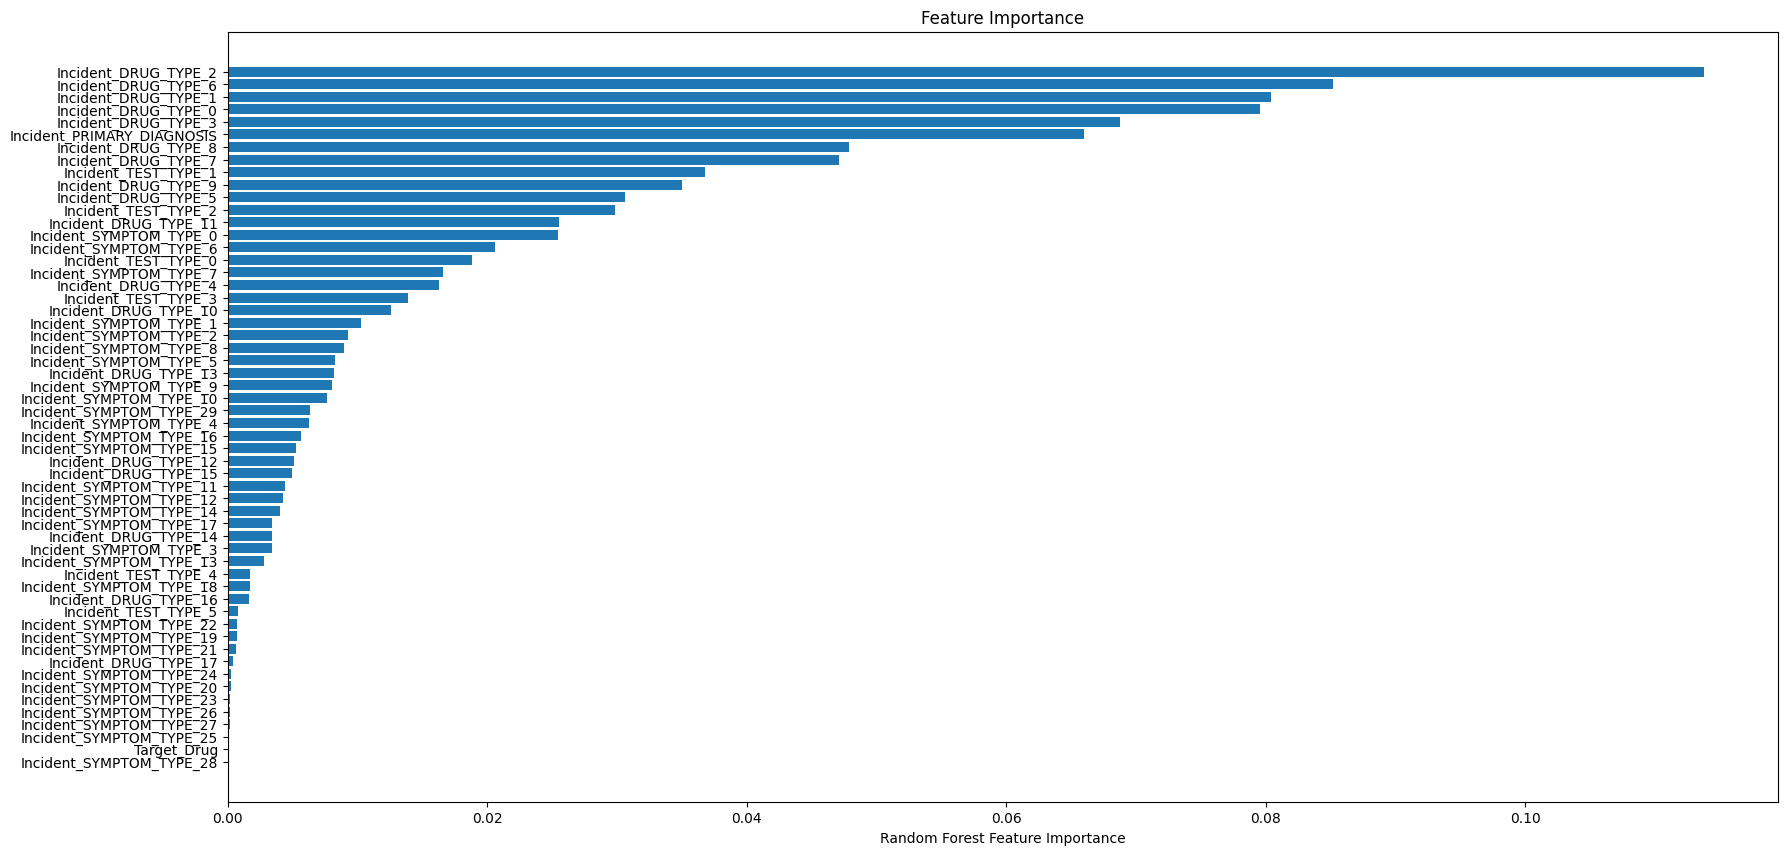

In [71]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(20,10))
plt.barh(df_train_concat.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [72]:
xg.feature_importances_

array([0.06271103, 0.04635945, 0.01734816, 0.01362689, 0.01312551,
       0.0150898 , 0.01284719, 0.01331208, 0.        , 0.02126057,
       0.09045997, 0.05393067, 0.10052498, 0.03125897, 0.04385685,
       0.01714803, 0.03703807, 0.01951127, 0.02612062, 0.00997647,
       0.00826937, 0.01288473, 0.00926451, 0.01294174, 0.01307768,
       0.01626273, 0.01280939, 0.00882807, 0.01016087, 0.00979081,
       0.        , 0.01133792, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02647234, 0.01343458, 0.01017375, 0.00957141,
       0.00904082, 0.00824566, 0.0146553 , 0.00860639, 0.00765911,
       0.03304602, 0.04603772, 0.01877793, 0.01211489, 0.01102965,
       0.        ], dtype=float32)

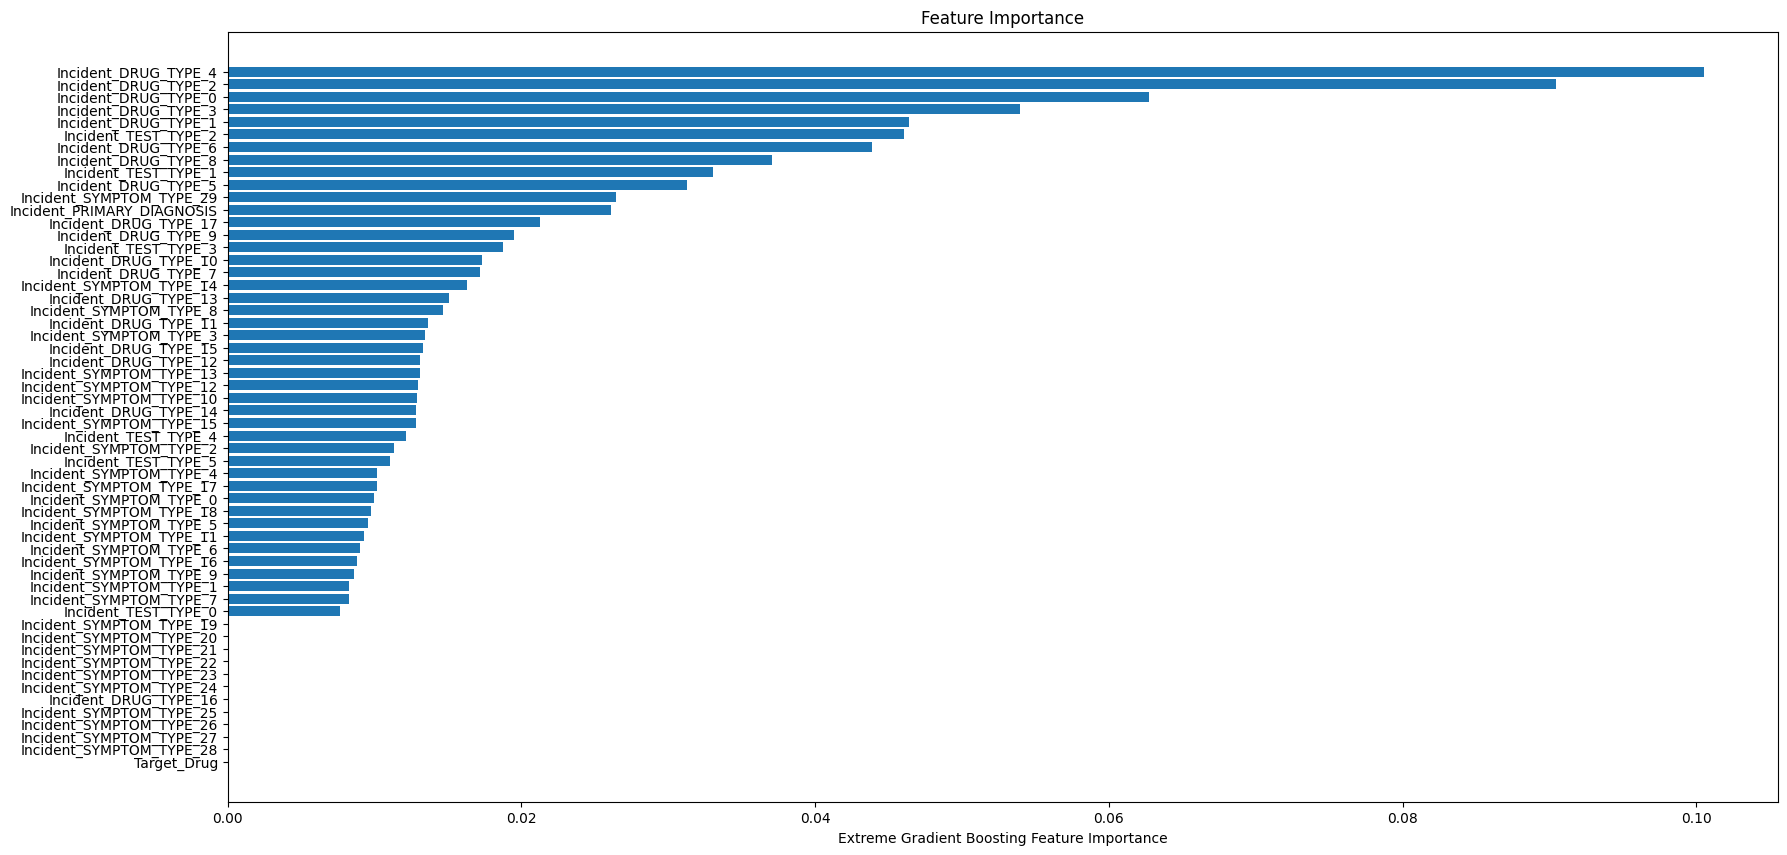

In [73]:
sorted_idx = xg.feature_importances_.argsort()
plt.figure(figsize=(20,10))
plt.barh(df_train_concat.columns[sorted_idx], xg.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

#### **suggestion to company**
Based on the feature importance given by Best Machine Learning Algorithm(Extreme Gradient Boosting)
the features of order given below:



1.   Incident Primary Diagnosis
2.   Incident Drug Type-2
3.   Incident Drug Type-4
4.   Incident Test Type-2
5.   Incident Drug Type-3

The above features are more impacting the target feature compare to other features


## **Loading Dataset - Test Data**

In [74]:
df_test = pd.read_parquet("/content/drive/MyDrive/Akaike/Datasets/test.parquet")
df_test

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
...,...,...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8


In [80]:
test_dum=pd.get_dummies(df_test['Incident'])
test_copy=df_test.copy()
test_copy=pd.concat([test_copy,test_dum],axis=1)
test_copy.drop(['Date','Incident'],inplace=True,axis=1)
test_col=list(test_copy.columns[1:])
test_copy=test_copy.groupby('Patient-Uid')[test_col].sum().reset_index()

In [81]:
test_copy

,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,8,3,0,1,0,0,0,0,0,...,3,0,0,0,2,0,0,0,0,0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2,30,0,0,0,0,0,9,0,...,2,0,0,0,0,0,0,1,0,0
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,4,33,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,33,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,4,6,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,14,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,5,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
test_copy['Incident_DRUG_TYPE_18']=0

In [83]:
T_list=list(test_copy.columns[1:])
x_test=test_copy[T_list]

In [84]:
y_pred_xg=xg.predict(scaler.transform(np.array(x_test)))

In [85]:
y_pred_xg

array([0, 1, 0, ..., 1, 1, 0])

In [86]:
test_copy['label']=y_pred_xg

In [87]:
test_copy=test_copy.astype({'label':'int'})

In [88]:
output_df=test_copy[['Patient-Uid','label']]

In [89]:
output_df

,Patient-Uid,label
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,1
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,0
...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,1
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,1
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,1
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,1


In [90]:
output_df['label'].value_counts()

0    7408
1    4074
Name: label, dtype: int64

In [ ]:
output_df.to_csv('final_submission.csv')